# Exercise Sheet 10

Willy Oesterheld (508791)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


Lambda	| Upper Limit	| Lower Limit	| Range
0	| 0.0		| 0.0		| [0.0, 0.0]
1	| 2.0		| 0.0		| [0.0, 3.0]
2	| 4.0		| 0.0		| [0.0, 5.0]
3	| 5.0		| 1.0		| [1.0, 6.0]
4	| 7.0		| 2.0		| [1.0, 8.0]
5	| 8.0		| 2.0		| [2.0, 9.0]
6	| 9.0		| 3.0		| [2.0, 10.0]
7	| 10.0		| 4.0		| [3.0, 12.0]
8	| 12.0		| 5.0		| [4.0, 13.0]
9	| 13.0		| 5.0		| [4.0, 14.0]
10	| 14.0		| 6.0		| [5.0, 15.0]
11	| 15.0		| 7.0		| [6.0, 17.0]
12	| 17.0		| 8.0		| [7.0, 18.0]


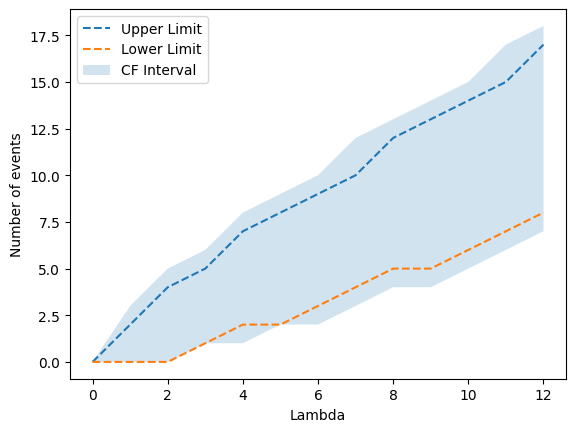

In [2]:
n_test = np.arange(0,100)
lmbda = np.arange(0,13)
n_upper = np.zeros(13) - 1
n_lower = n_upper.copy()
n_range_upper = n_upper.copy()
n_range_lower = n_upper.copy()

print("Lambda\t| Upper Limit\t| Lower Limit\t| Range")
for i, l in enumerate(lmbda):
    c = sp.stats.poisson.cdf(n_test, l)
    n_upper[i] = np.argmin(c < 0.9)
    n_lower[i] = np.argmax(c > 0.1)
    n_range_upper[i] = np.argmin(c < 0.95)
    n_range_lower[i] = np.argmax(c > 0.05)
    print(f"{l}\t| {n_upper[i]}\t\t| {n_lower[i]}\t\t| [{n_range_lower[i]}, {n_range_upper[i]}]")

plt.plot(lmbda, n_upper, "--", label="Upper Limit")
plt.plot(lmbda, n_lower, "--", label="Lower Limit")
plt.fill_between(lmbda, n_range_upper, n_range_lower, alpha=0.2, label="CF Interval")
plt.xlabel("Lambda")
plt.ylabel("Number of events")
plt.legend()
plt.show()

In [14]:
n = 0

def f(l):
    val = sp.stats.poisson.cdf(n, l) - 0.9
    print((l, val))
    return val

sol = sp.optimize.bisect(f, 0, 100)
print(sol)

(0.0, 0.09999999999999998)
(100.0, -0.9)
(50.0, -0.9)
(25.0, -0.8999999999861121)
(12.5, -0.899996273346828)
(6.25, -0.8980695458637723)
(3.125, -0.8560630663765926)
(1.5625, -0.6903886128489022)
(0.78125, -0.44216663822838576)
(0.390625, -0.22336615383827108)
(0.1953125, -0.07742243760133538)
(0.09765625, 0.006960617887383558)
(0.146484375, -0.03626077184523413)
(0.1220703125, -0.014913866304065215)
(0.10986328125, -0.004043379007431902)
(0.103759765625, 0.00144182872535481)
(0.1068115234375, -0.0013049600191785693)
(0.10528564453125, 6.738653654014826e-05)
(0.106048583984375, -0.0006190484956392073)
(0.1056671142578125, -0.0002758964430947808)
(0.10547637939453125, -0.00010427132228529867)
(0.10538101196289062, -1.8446485514855837e-05)
(0.10533332824707031, 2.4469002303240117e-05)
(0.10535717010498047, 3.0110025980301103e-06)
(0.10536909103393555, -7.717805406759481e-06)
(0.10536313056945801, -2.353417391520729e-06)
(0.10536015033721924, 3.2878860645180197e-07)
(0.10536164045333862, 

Events	| Upper Limit	| Lower Limit	| Range
0	| 0.105		| 2.3		| [3.0, 0.0513]
1	| 0.532		| 3.89		| [4.74, 0.355]
2	| 1.1		| 5.32		| [6.3, 0.818]
3	| 1.74		| 6.68		| [7.75, 1.37]
4	| 2.43		| 7.99		| [9.15, 1.97]
5	| 3.15		| 9.27		| [10.5, 2.61]
6	| 3.89		| 10.5		| [11.8, 3.29]
7	| 4.66		| 11.8		| [13.1, 3.98]
8	| 5.43		| 13.0		| [14.4, 4.7]
9	| 6.22		| 14.2		| [15.7, 5.43]
10	| 7.02		| 15.4		| [17.0, 6.17]
11	| 7.83		| 16.6		| [18.2, 6.92]
12	| 8.65		| 17.8		| [19.4, 7.69]


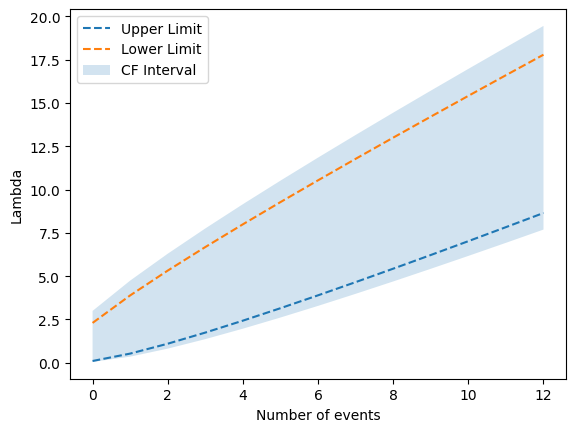

In [21]:
n = np.arange(0,13)
l_upper = np.zeros(13) - 1
l_lower = l_upper.copy()
l_range_upper = l_upper.copy()
l_range_lower = l_upper.copy()

def find_lambda(event_count, offset):
    return sp.optimize.bisect(lambda x : sp.stats.poisson.cdf(event_count, x)-offset, 0, 100)

print("Events\t| Upper Limit\t| Lower Limit\t| Range")
for i in n:
    l_upper[i] = find_lambda(i, 0.9)
    l_lower[i] = find_lambda(i, 0.1)
    l_range_upper[i] = find_lambda(i, 0.95)
    l_range_lower[i] = find_lambda(i, 0.05)
    print(f"{i}\t| {l_upper[i]:.3}\t\t| {l_lower[i]:.3}\t\t| [{l_range_lower[i]:.3}, {l_range_upper[i]:.3}]")

plt.plot(n, l_upper, "--", label="Upper Limit")
plt.plot(n, l_lower, "--", label="Lower Limit")
plt.fill_between(n, l_range_upper, l_range_lower, alpha=0.2, label="CF Interval")
plt.xlabel("Number of events")
plt.ylabel("Lambda")
plt.legend()
plt.show()